# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


<Axes: >

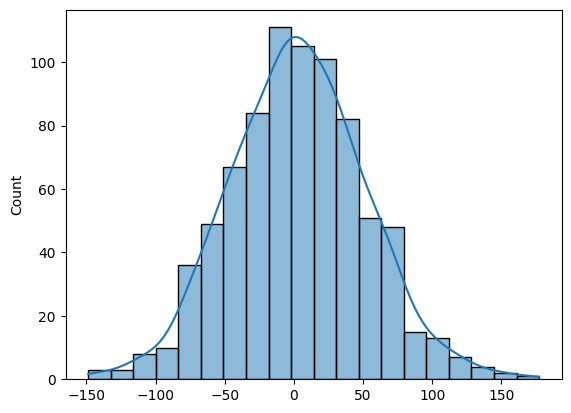

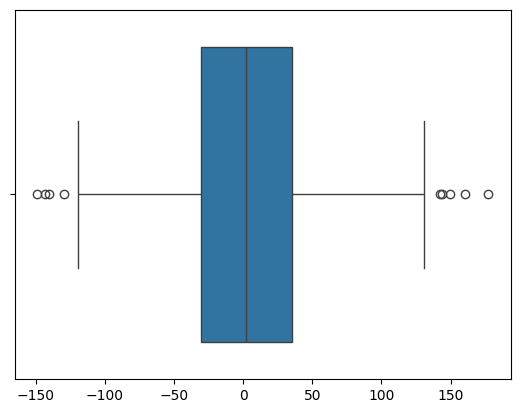

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
# y=14X+10
X=np.random.randn(1000)*50  #normal dist 
Y=14*X+10
Y+= np.random.normal(0, 2, size=Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=44, shuffle =True)
plt.figure()
sns.histplot(x=X_train,bins=20,kde=True) 
plt.figure()
sns.boxplot(x=X_train)




In [31]:
from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import StandardScaler
X_train_scaled = X_train.reshape(-1, 1)  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)

model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
print(model1.intercept_, model1.coef_)
X_test_scaled = scaler.transform(X_test.reshape(-1,1))
predictions= model1.predict(X_test_scaled)
predections_train=model1.predict(X_train_scaled)

54.61476450684882 [682.56081056]


C:\Users\Abdallah\AppData\Local\Temp\ipykernel_14208\189530804.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


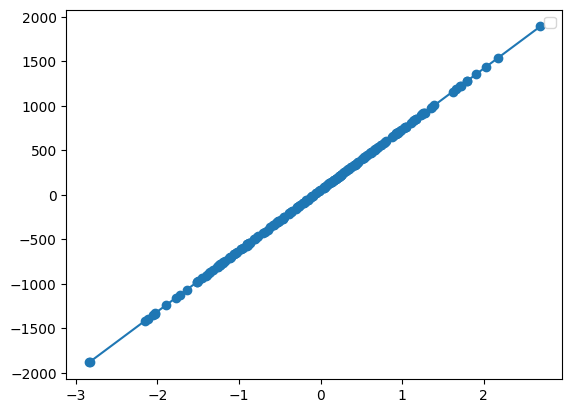

In [ ]:

plt.scatter(x=X_test_scaled[:,0] ,y=y_test)
sns.lineplot(x=X_test_scaled[:,0] ,y=predictions)





In [48]:
print ("R^2 TRAIN",model1.score(X_train_scaled, y_train))
print ("R^2 TEST",model1.score(X_test_scaled, y_test))

R^2 TRAIN 0.9999915822560024
R^2 TEST 0.9999900903652266


In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print ( "TRAIN MEAN SQUARE ERROR",mean_squared_error(y_train,predections_train))
print ( "TEST MEAN SQUARE ERROR",mean_squared_error(y_test,predictions))

print ( "TRAIN MEAN ABS ERROR",mean_absolute_error(y_train,predections_train))
print ( "TEST MEAN ABS ERROR",mean_absolute_error(y_test,predictions))

print ( "TRAIN R^2 ERROR",r2_score(y_train,predections_train))
print ( "TEST R^2 ERROR",r2_score(y_test,predictions))

TRAIN MEAN SQUARE ERROR 3.92176953529409
TEST MEAN SQUARE ERROR 4.46765040084039
TRAIN MEAN ABS ERROR 1.601482513367054
TEST MEAN ABS ERROR 1.6556459197597366
TRAIN R^2 ERROR 0.9999915822560024
TEST R^2 ERROR 0.9999900903652266


# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [ ]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


In [ ]:
os.listdir(path)

['airlines_flights_data.csv']

In [ ]:
full_path = os.path.join(path,os.listdir(path)[0])

In [ ]:
import pandas as pd
df = pd.read_csv(full_path)

In [ ]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*
